#### Answers submitted by:  Guo Li  
#### Date:  April 1st, 2017  
---

# Python Part 3:  Pandas Exercises
---

## Q1:  Read in the libraries you need

In [138]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

In [139]:
# imports a library 'pandas', names it as 'pd'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

# enables inline plots, without it plots don't show up in the notebook
%matplotlib inline

## Q2:  Set options in pandas so it displays `max_rows` to 10

In [140]:
# set various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.precision', 3)

## Q3:  What versions of `Python` and `pandas` are you running?  



In [141]:
print("Pandas version:",pd.__version__)
print("Numpy version:",np.__version__)

Pandas version: 0.19.2
Numpy version: 1.11.3


In [142]:
# confirming which version of Python I am using
import sys
print("Python Version:", sys.version)

Python Version: 2.7.13 |Anaconda 4.3.1 (x86_64)| (default, Dec 20 2016, 23:05:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]


## Q4:  Read in the "olive" dataset that is available in this folder
Description:  572 olive oil samples from 3 different regions (and 9 sub-regions) of Italy; for each sample the normalized concentrations of 8 fatty acids are given.  
Source:  http://www2.chemie.uni-erlangen.de/publications/ANN-book/datasets/oliveoil/

There are 3 regions: 
* South
* North
* Sardinia

There are 9 sub-regions (areas): 
* North Apulia
* South Apulia
* Calabria
* Sicily
* Inland
* Coastal Sardinia
* Umbria
* East
* West Liguria

Supplemental report:  http://www.public.iastate.edu/~dicook/stat503/05/cs-olive.pdf

In [143]:
# read csv data into pandas dataframe
df = pd.read_csv('olive.csv')

## Q5:  How many rows and columns are in this dataframe?

In [144]:
len(df.index), len(df.columns.values)

(572, 11)

## Q6:  Print the first 4 rows of the data

In [145]:
df.iloc[:4,:]

,Unnamed: 0,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,1.North-Apulia,1,1,1075,75,226,7823,672,36,60,29
1,2.North-Apulia,1,1,1088,73,224,7709,781,31,61,29
2,3.North-Apulia,1,1,911,54,246,8113,549,31,63,29
3,4.North-Apulia,1,1,966,57,240,7952,619,50,78,35


## Q7:  How many different data types are in this dataframe, and what are the data types?

In [151]:
len(df.dtypes.unique()), list(df.dtypes.unique())

(2, [dtype('O'), dtype('int64')])

## Q8:  Create a new column
### Copy the column to:  'Unnamed: 0' to 'sub_region_raw'

In [152]:
df["sub_region_raw"] = df['Unnamed: 0']

## Q9:  Rename a column
### 'Unnamed: 0' to:  'sub_region_desc'

In [153]:
df = df.rename(columns={'Unnamed: 0':'sub_region_desc'})

## Q10:  Rename the column 'area' to:  'sub_region'

In [154]:
df = df.rename(columns={'area':'sub_region'})

## Q11:  How many unique values of 'region' are there?

Hint:  the answer should be 3

In [155]:
len(df.region.unique())

3

## Q12:  How many unique values of 'sub_region' are there?

Hint:  the answer should be 9

In [156]:
len(df.sub_region.unique())

9

## Q13:  How many unique values of 'sub_region_desc' are there?
Hint:  we would like the answer to be 9, but here's where we run into some messy data

In [158]:
len(df.sub_region_desc.unique())

572

## Q14:  Looks like 'sub_region_desc' has line numbers attached to the beginning of region name.  We need to do some data cleaning.  Can you remove them?  
```
 	region 	sub_region 	palmitic 	palmitoleic 	stearic 	oleic 	linoleic 	linolenic 	arachidic 	eicosenoic 	sub_region_raw
sub_region_desc 											
1.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
10.North-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
100.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
101.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
102.South-Apulia 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1 	1
```

Hint:  check out this link
http://stackoverflow.com/questions/39583264/pandas-strip-numbers-and-parenthesis-from-string
 

In [159]:
 df.sub_region_desc = df.sub_region_desc.apply(lambda x: x.split('.')[1])

In [7]:
#df.head()

In [8]:
#df.head()

In [9]:
#df.head()

## Q15:  Try again:  How many unique values of 'sub_region_desc' are there?
Hint:  you should see 9 of them!

In [160]:
 len(df.sub_region_desc.unique())

9

## Q16:   Create a horizontal frequency barplot for 'region'

([<matplotlib.axis.YTick at 0x1146cce90>,
 <a list of 3 Text yticklabel objects>)

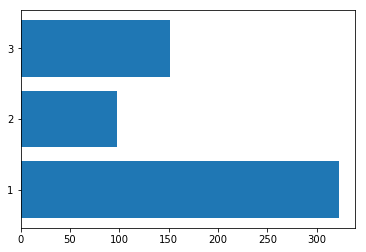

In [161]:
s = df.region.value_counts()
plt.barh(s.index,s)
plt.yticks(s.index)

## Q17:   Create a horizontal frequency barplot for 'sub_region'

([<matplotlib.axis.YTick at 0x11492e8d0>,
 <a list of 9 Text yticklabel objects>)

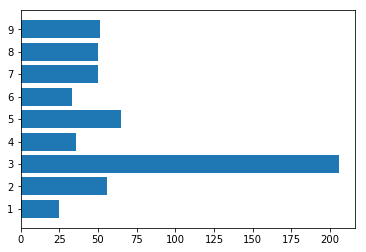

In [162]:
s = df.sub_region.value_counts()
plt.barh(s.index,s)
plt.yticks(s.index)

## Q18:   Create a horizontal frequency barplot for 'sub_region_desc'

In [163]:
s = df.sub_region_desc.value_counts()

([<matplotlib.axis.YTick at 0x11499b950>,
 <a list of 9 Text yticklabel objects>)

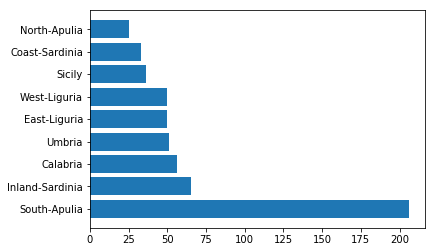

In [164]:
plt.barh(range(len(s.index)),s)
plt.yticks(range(len(s.index)),s.index)